In [1]:
import pandas as pd
import numpy as np
import os
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import time
import sys 
try:
    sys.path.append(os.path.abspath('..'))
except:
    pass
from src.model_trainer import BayesianMMMTrainer


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## 1. Setup and Initialization

We need to import the necessary libraries and the BayesianMMMTrainer class. We will use the defined file paths for the actual data loading.



In [2]:
# Define Configuration. Must match the columns expected by the Trainer

test_config = {
    "date_col": "DATE", 
    "revenue_col": "revenue",
    "spend_cols": ["tv_S", "ooh_S", "print_S", "facebook_S", "search_S"],
    "control_cols": ["competitor_sales_B", "newsletter"],
    "fourier_k": 3,
    "mcmc_params": {"draws": 1000, "tune": 1000, "target_accept": 0.9},
    "data_path": "../data/dt_simulated_weekly.csv" 
}

# Define Paths

data_path = test_config['data_path']
holiday_path = "../data/dt_prophet_holidays.csv"


In [22]:

df = pd.read_csv(data_path)
df

,DATE,revenue,tv_S,ooh_S,print_S,facebook_I,search_clicks_P,search_S,competitor_sales_B,facebook_S,events,newsletter
0,2015-11-23,2.754372e+06,22358.346667,0.000000,12728.488889,2.430128e+07,0.000000,0.000000,8125009,7607.132915,na,19401.653846
1,2015-11-30,2.584277e+06,28613.453333,0.000000,0.000000,5.527033e+06,9837.238486,4133.333333,7901549,1141.952450,na,14791.000000
2,2015-12-07,2.547387e+06,0.000000,132278.400000,453.866667,1.665159e+07,12044.119653,3786.666667,8300197,4256.375378,na,14544.000000
3,2015-12-14,2.875220e+06,83450.306667,0.000000,17680.000000,1.054977e+07,12268.070319,4253.333333,8122883,2800.490677,na,2800.000000
4,2015-12-21,2.215953e+06,0.000000,277336.000000,0.000000,2.934090e+06,9467.248023,3613.333333,7105985,689.582605,na,15478.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
203,2019-10-14,2.456240e+06,0.000000,32230.933333,20496.488889,0.000000e+00,50946.774471,14946.666667,7612762,0.000000,na,28157.000000
204,2019-10-21,2.182825e+06,20655.680000,0.000000,0.000000,1.896065e+07,34560.015940,13826.666667,6701667,4454.152517,na,10644.000000
205,2019-10-28,2.377707e+06,2931.000000,7516.800000,2330.133333,0.000000e+00,46129.234713,15293.333333,7688920,0.000000,na,9597.000000
206,2019-11-04,2.732825e+06,2993.733333,0.000000,3206.844444,0.000000e+00,50569.330154,17880.000000,8815710,0.000000,na,90189.000000


## 2. Model Training

Instantiate the trainer and run the full analysis pipeline.

In [4]:
%%time 
# Create an instance of the Bayesian MMM Trainer

trainer = BayesianMMMTrainer(
    config=test_config, 
    data_path=test_config['data_path'], 
    holidays_path=holiday_path
)

try:
    roi_results = trainer.run_full_analysis()
    
except Exception as e:
    print(f"\nFATAL ERROR during training. Ensure all dependencies are installed and the trainer classes are correctly imported.")
    print(f"Error details: {e}")
    roi_results = {}
    

if roi_results:
    print("\n--- FINAL ROI RESULTS ---")
    print(pd.DataFrame(roi_results).T[['unscaled_roi']].sort_values('unscaled_roi', ascending=False))
else:
    print("\n--- ROI RESULTS UNAVAILABLE ---")
    print("ROI results could not be calculated due to a fatal error during the training pipeline.")



Sampling 4 chains, 0 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:09:28

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 569 seconds.
INFO:pymc.sampling.mcmc:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 569 seconds.



Sampling complete. Posterior Summary (Partial):
                    mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
beta[tv_S]         0.124  0.028   0.072    0.177      0.000    0.000   
beta[ooh_S]        0.018  0.014   0.000    0.042      0.000    0.000   
beta[print_S]      0.053  0.022   0.010    0.092      0.000    0.000   
beta[facebook_S]   0.035  0.021   0.000    0.070      0.000    0.000   
beta[search_S]     0.027  0.020   0.000    0.064      0.000    0.000   
alpha[tv_S]        0.182  0.112   0.006    0.379      0.002    0.002   
alpha[ooh_S]       0.184  0.112   0.005    0.383      0.002    0.002   
alpha[print_S]     0.180  0.112   0.008    0.377      0.002    0.002   
alpha[facebook_S]  0.180  0.115   0.008    0.383      0.002    0.002   
alpha[search_S]    0.182  0.109   0.008    0.380      0.002    0.002   
sigma              0.360  0.018   0.326    0.393      0.000    0.000   

                   ess_bulk  ess_tail  r_hat  
beta[tv_S]           3120.0    2351.0  

## 3. Posterior Analysis and Visualisation

We use ArviZ to inspect the posterior distributions of the key parameters (alpha for decay, beta for effectiveness).


Plotting MCMC Trace and Mixing Diagnostics...


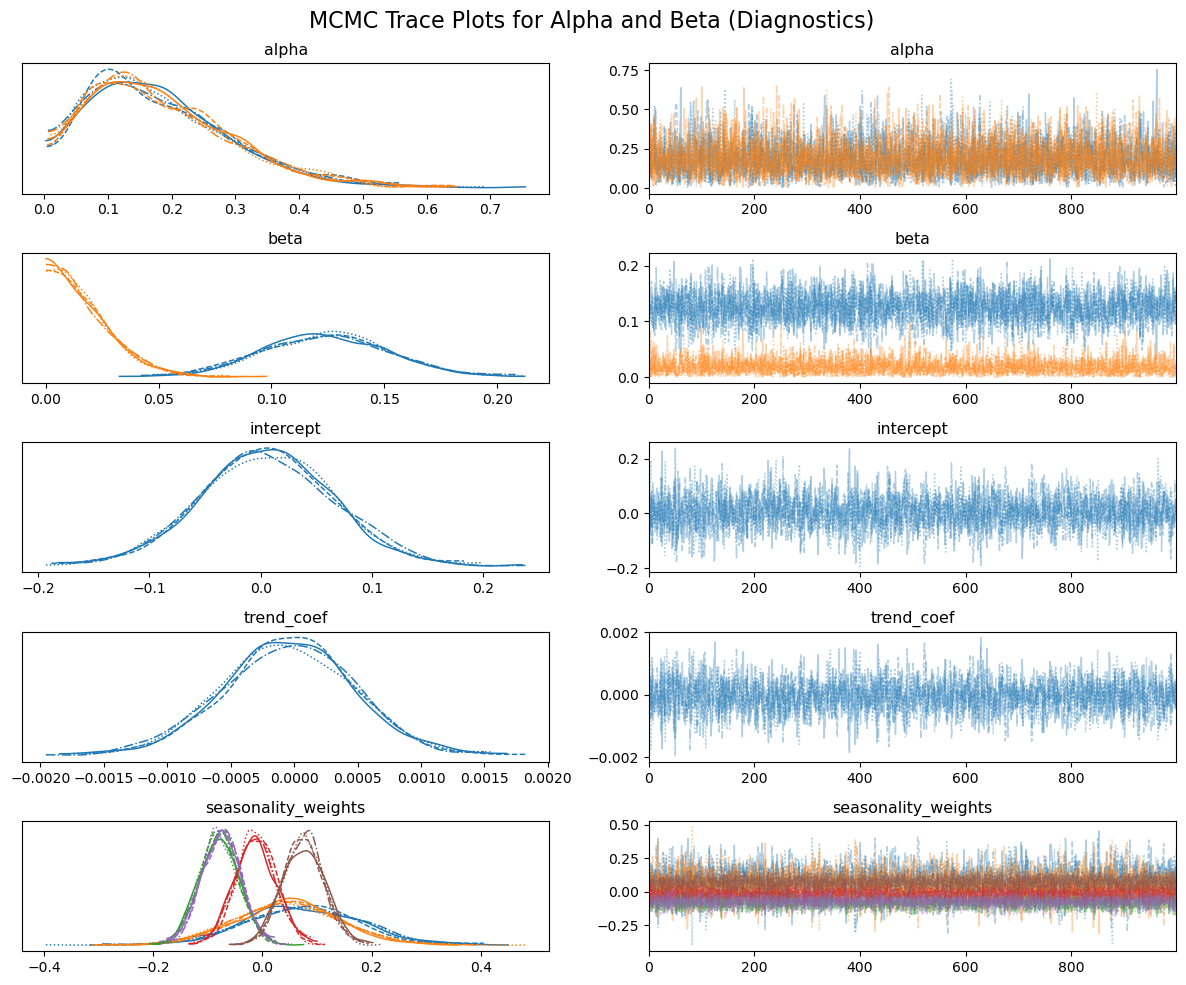

In [18]:
# MCMC Trace Diagnostics (Trace and Mixing Plots) ---

print("\nPlotting MCMC Trace and Mixing Diagnostics...")
    
# Plotting alpha and beta for the first two channels (e.g., tv_S and ooh_S)
# The trace plot shows the sample path and helps visualize mixing.
az.plot_trace(
    trainer.trace,
    var_names=["alpha", "beta","intercept","trend_coef","seasonality_weights"],
    coords={"channel": test_config['spend_cols'][:2]}, # Show the first two channels
    figsize=(12, 10),
    compact=True # Use compact layout for better readability
)
plt.suptitle("MCMC Trace Plots for Alpha and Beta (Diagnostics)", fontsize=16)
plt.tight_layout()
plt.show()


Plotting Posterior Distribution of Adstock Decay (alpha)...


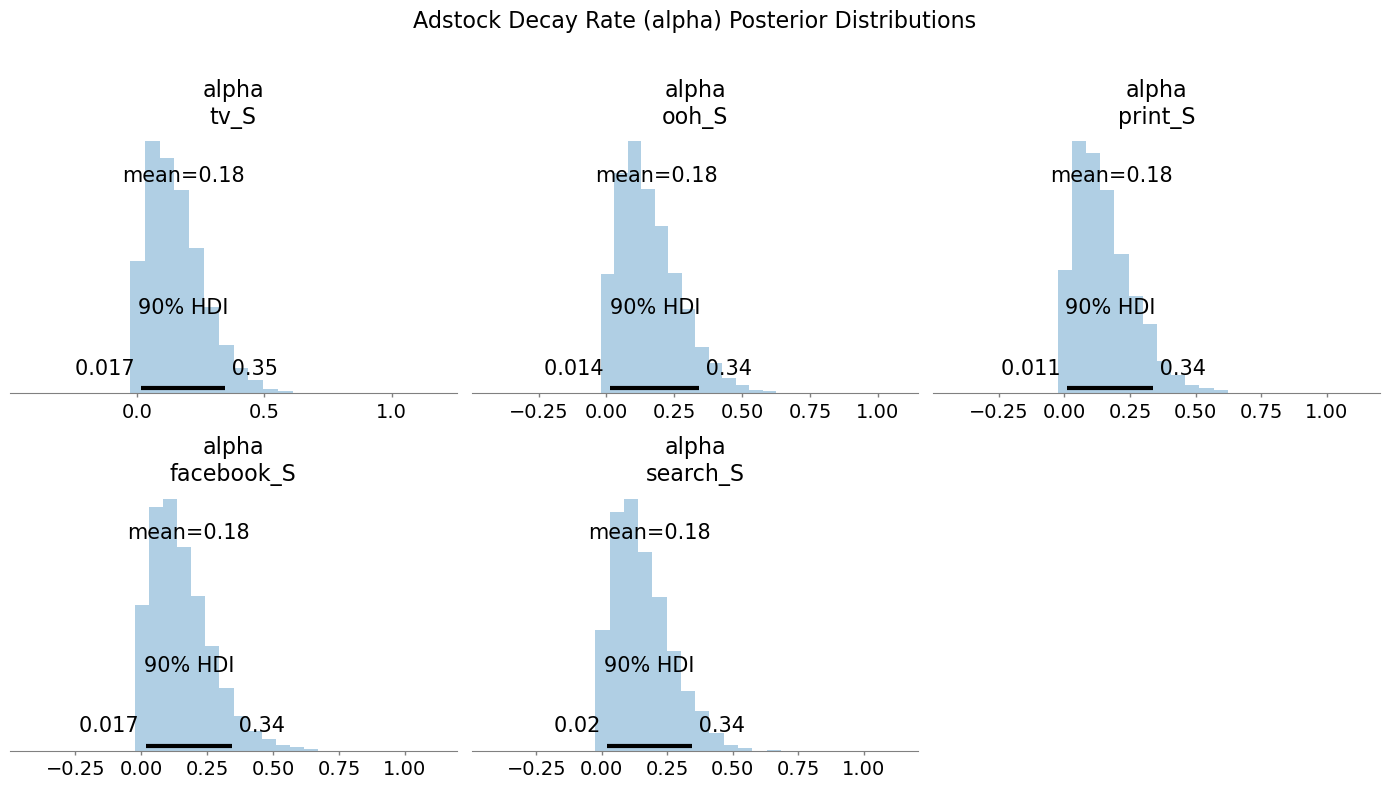

In [21]:
# Posterior Distribution of Alpha (Adstock Decay) ---
print("\nPlotting Posterior Distribution of Adstock Decay (alpha)...")
   
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
    
    
az.plot_posterior(
        trainer.trace, 
        var_names=["alpha"], 
        kind="hist",
        hdi_prob=0.90,
        coords={"channel": test_config['spend_cols']},
        ax=axes.flatten()[:len(test_config['spend_cols'])]
)
   
if len(test_config['spend_cols']) < 6:
    axes.flatten()[-1].axis('off')
        
plt.suptitle("Adstock Decay Rate (alpha) Posterior Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout for suptitle
plt.show()


Plotting Posterior Distribution of Channel Effectiveness (beta)...


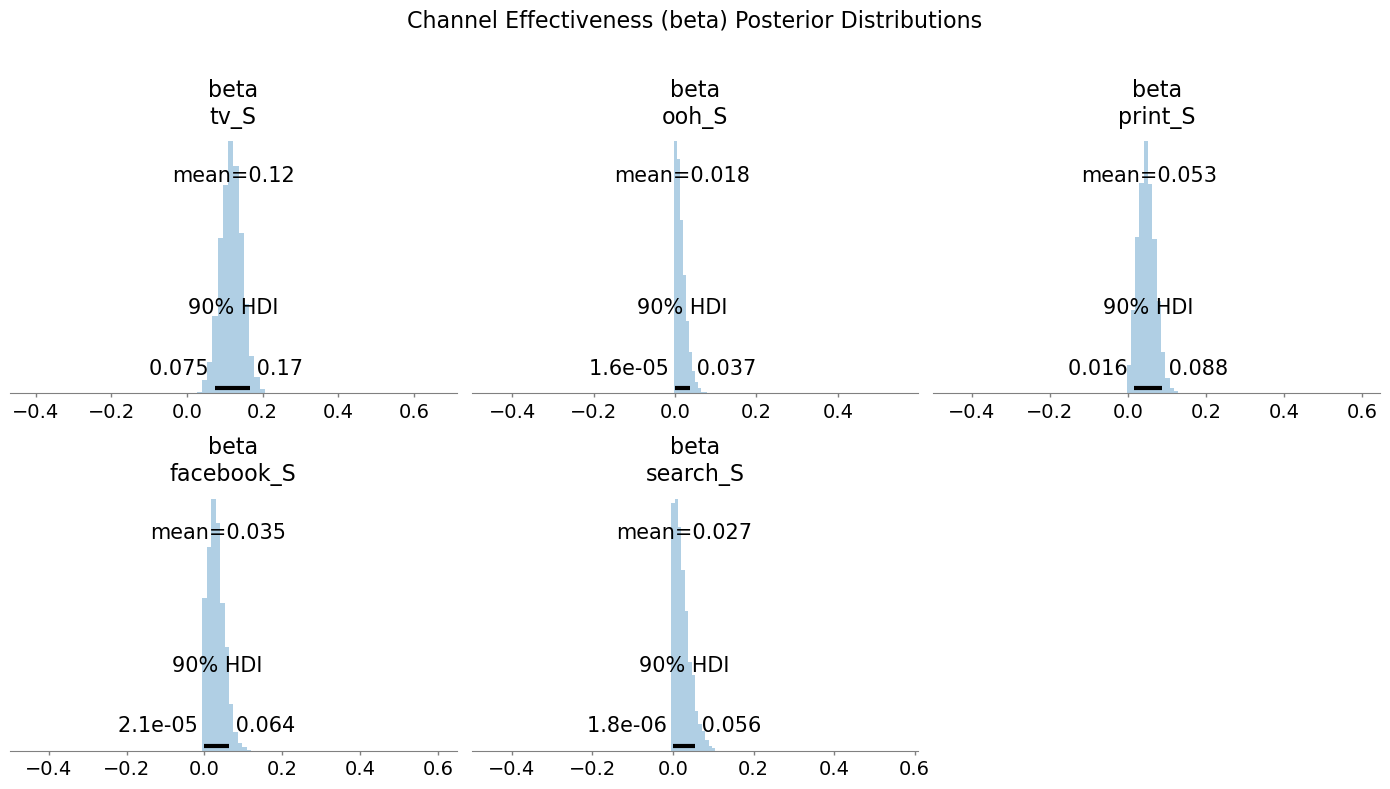

In [24]:
# Posterior Distribution of Beta (Channel Effectiveness) ---
print("\nPlotting Posterior Distribution of Channel Effectiveness (beta)...")
    
    
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
    
az.plot_posterior(
        trainer.trace, 
        var_names=["beta"], 
        kind="hist",
        hdi_prob=0.90,
        coords={"channel": test_config['spend_cols']},
        ax=axes.flatten()[:len(test_config['spend_cols'])]
)
   
if len(test_config['spend_cols']) < 6:
    axes.flatten()[-1].axis('off')
        
plt.suptitle("Channel Effectiveness (beta) Posterior Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_19848/497292368.py:21: SyntaxWarning: invalid escape sequence '\s'
  az.plot_kde(prior_samples, ax=ax, plot_kwargs={'color': 'blue', 'linestyle': '--'}, label='Prior (HalfNormal $\sigma$=1)')



Plotting Prior vs. Posterior for a sample parameter (beta for 'tv_S')...


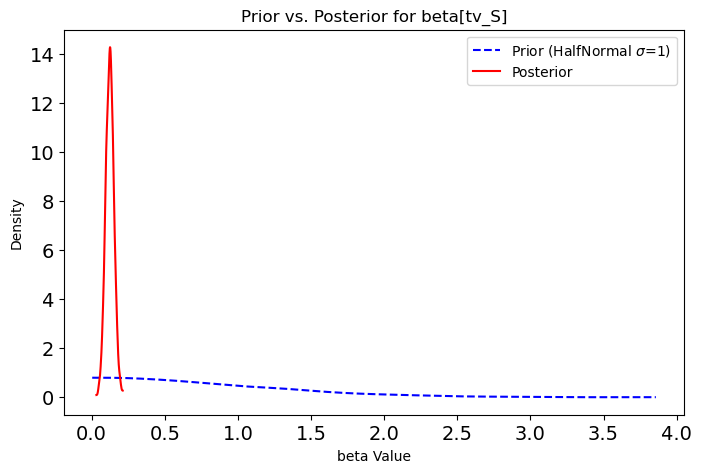


Observation: The Posterior distribution is often tighter and centered based on the data, reflecting Bayesian updating.


In [23]:
# Prior vs. Posterior Visualization ---

print("\nPlotting Prior vs. Posterior for a sample parameter (beta for 'tv_S')...")
    
# Select the variable and coordinate (e.g., beta for 'tv_S')
var_name = "beta"
channel_name = test_config['spend_cols'][0] # Use the first channel as example: 'tv_S'
    
# Get the Posterior data
post_data = trainer.trace.posterior[var_name].sel(channel=channel_name).values.flatten()
    
#Define the Prior distribution for comparison (HalfNormal(sigma=1) in your model)
prior_sigma = 1
# Sample points from the prior distribution (HalfNormal)
prior_samples = np.abs(np.random.normal(loc=0, scale=prior_sigma, size=len(post_data)))
    
#Plotting
fig, ax = plt.subplots(figsize=(8, 5))

# Plot Prior Density
az.plot_kde(prior_samples, ax=ax, plot_kwargs={'color': 'blue', 'linestyle': '--'}, label='Prior (HalfNormal $\sigma$=1)')
    
# Plot Posterior Density
az.plot_kde(post_data, ax=ax, plot_kwargs={'color': 'red'}, label='Posterior')
    
ax.set_title(f"Prior vs. Posterior for {var_name}[{channel_name}]")
ax.set_xlabel(f"{var_name} Value")
ax.set_ylabel("Density")
ax.legend()
plt.show()
    
print("\nObservation: The Posterior distribution is often tighter and centered based on the data, reflecting Bayesian updating.")

Sampling ... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:00:09

/home/kaushikm/anaconda3/envs/pymcenv/lib/python3.12/site-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


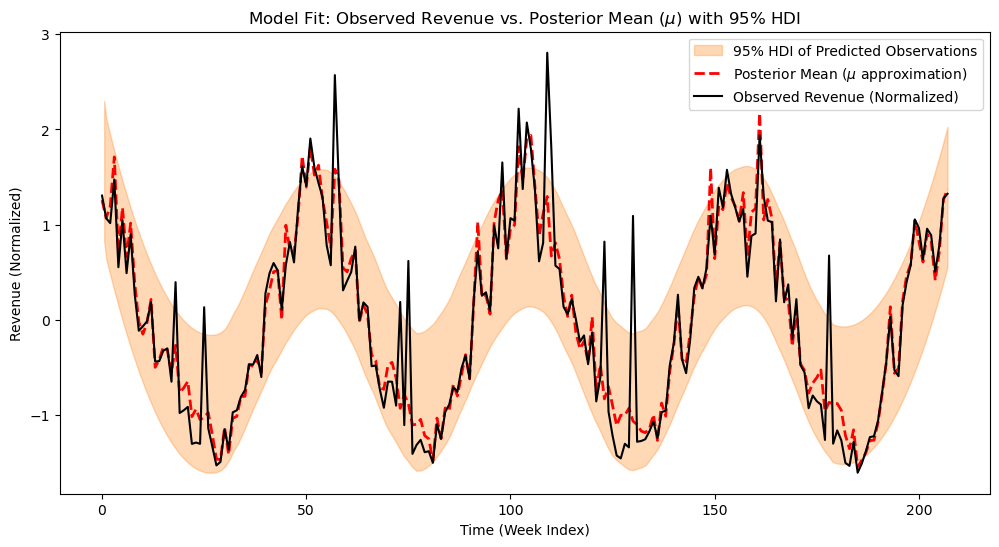

In [29]:
#  Posterior Mean (mu) Prediction ---

print("\nPlotting Posterior Mean (mu) Prediction (95% HDI)...")
    
    
n_weeks = len(trainer.data_df) # Get the length of the data used for training
    
# Generate Posterior Predictive Samples, explicitly requesting the model's mean (mu)
with trainer.model:
        
    ppc = pm.sample_posterior_predictive(trainer.trace) 
    
# Extract predicted observation (y_obs) samples
y_pred_samples = ppc.posterior_predictive['y_obs'].values.reshape(-1, n_weeks)
y_obs_norm = trainer.y_revenue_norm.flatten()

# Calculate the Posterior Mean (E[y_obs] ~ mu)
posterior_mean = np.mean(y_pred_samples, axis=0)

# Plotting the Model Fit with HDI (simulated mu vs. observed y)
fig, ax = plt.subplots(figsize=(12, 6))
    
# Plot the 95% HDI of the full y_obs samples (showing the expected range of observations)
az.plot_hdi(
        np.arange(n_weeks), 
        y_pred_samples, # Using y_pred_samples here
        ax=ax, 
        fill_kwargs={'alpha': 0.3, 'label': '95% HDI of Predicted Observations'},
        hdi_prob=0.95
)
    
# Plot the posterior mean line (the cleaner signal estimate)
ax.plot(posterior_mean, color='red', label='Posterior Mean ($\mu$ approximation)', linewidth=2, linestyle='--')

# Plot the observed data
ax.plot(y_obs_norm, color='black', label='Observed Revenue (Normalized)')

ax.set_title("Model Fit: Observed Revenue vs. Posterior Mean ($\mu$) with 95% HDI")
ax.set_xlabel("Time (Week Index)")
ax.set_ylabel("Revenue (Normalized)")
ax.legend()
plt.show()


In [30]:
az.to_netcdf(trainer.trace, "mmm_inference_data.nc")

# To load it later:
loaded_trace = az.from_netcdf("mmm_inference_data.nc")